<h1 >GDP, Productivity & Global Trends <h1>

<img src="https://storage.googleapis.com/kaggle-datasets-images/3911151/6798324/026fb7195fd45a451b5f3f39f9a5118e/dataset-cover.jpg?t=2023-10-26-04-53-00" height=400></center>

This project uses data from **The Economist**'s October 4th, 2023 article **"Productivity has grown faster in western Europe than in America"**, which explores productivity trends across regions. The dataset combines information from the **OECD and World Bank**, and was curated by The Economist and Sondre Solstad (2023).

> 📖 **Citation**:  
The Economist and Solstad, Sondre (corresponding author), 2023. _“All work and no play”_, The Economist, October 4th issue, 2023.  
Source: [Kaggle Dataset](https://www.kaggle.com/)  



<h1>Project Scope<h1>

This project explores global and country-level trends in GDP and related socio-economic indicators, using data featured in The Economist (2023). Key questions include:
### 📊 Economic Performance

1. Which countries have the highest GDP per capita in the most recent year?
2. Compare GDP vs PPP-adjusted GDP for the top 5 economies in 2020.
3. How has GDP per capita evolved over time for selected countries?

---

### 🧠 Demographics & Labor

4. Is there a relationship between the percentage of population over 65 and GDP per capita?
5. Do top 10 countries by GDP/capita also show low unemployment? (Inequality insight)
6. Any relationship between hours worked and GDP (or GDP/hour)?

---

### 🌍 Global & Regional Comparisons

7. How has the **global average GDP per capita** evolved since 1990?
8. How does the **global trajectory** compare with countries like US, India, China?
9. Which regions contribute the most to global GDP (Sunburst)?

---

### 📊Regression analysis questions (exploratory)

10. Is there a significant relationship between labor force size and GDP per capita across countries?

11. Can we predict GDP per capita using demographic indicators like labor force size and percentage of population over 65?

12. Can we predict GDP per capita using demographic indicators like labor force and population over 65?


This notebook contains:

1. Dataset overview and initial exploration  
2. Data cleaning steps  
3. Planned SQL questions  
4. Environment setup and schema


<h2>Install Package with Country Codes<h2>












In [50]:
%pip install iso3166
%pip install --upgrade plotly
!pip install -q kaleido

<h2>Import Statements <h2>

In [4]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
import sqlite3


### Notebook Presentation

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

Make folder visuals

In [ ]:
!mkdir -p visuals

In [ ]:
from google.colab import files

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Load the Data

In [7]:
data = pd.read_csv('gdp_over_hours_worked.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [8]:
print(data.shape)
print(data.columns)

(11560, 27)
Index(['iso2c', 'year', 'country', 'iso3c', 'pop', 'labor_force', 'gdp_ppp_c',
       'gdp_ppp', 'gdp', 'gdp_c', 'unemployment_r', 'pop_over_65',
       'working_age_pop_pct', 'employment_rate', 'hours_worked', 'total_hours',
       'hours_per_employed', 'employed', 'total_hours_alternative',
       'gdp_over_k_hours_worked', 'gdp_ppp_over_k_hours_worked',
       'gdp_over_pop', 'gdp_ppp_over_pop', 'gdp_ppp_over_labor_force',
       'gdp_ppp_over_pop_c', 'gdp_over_pop_c',
       'gdp_ppp_over_k_hours_worked_c'],
      dtype='object')


In [9]:
data.head()

,iso2c,year,country,iso3c,pop,labor_force,gdp_ppp_c,gdp_ppp,gdp,gdp_c,...,employed,total_hours_alternative,gdp_over_k_hours_worked,gdp_ppp_over_k_hours_worked,gdp_over_pop,gdp_ppp_over_pop,gdp_ppp_over_labor_force,gdp_ppp_over_pop_c,gdp_over_pop_c,gdp_ppp_over_k_hours_worked_c
0,1A,1980,Arab World,ARB,"167,707,208.00",NaN,NaN,NaN,"459,804,598,569.46","859,480,131,702.59",...,NaN,NaN,NaN,NaN,"2,741.71",NaN,NaN,NaN,"5,124.88",NaN
1,1A,1981,Arab World,ARB,"173,118,753.00",NaN,NaN,NaN,"474,812,142,540.09","888,479,304,523.50",...,NaN,NaN,NaN,NaN,"2,742.70",NaN,NaN,NaN,"5,132.20",NaN
2,1A,1982,Arab World,ARB,"178,587,926.00",NaN,NaN,NaN,"444,575,870,914.34","814,888,271,801.23",...,NaN,NaN,NaN,NaN,"2,489.39",NaN,NaN,NaN,"4,562.95",NaN
3,1A,1983,Arab World,ARB,"184,342,569.00",NaN,NaN,NaN,"418,462,069,813.76","764,300,353,587.64",...,NaN,NaN,NaN,NaN,"2,270.02",NaN,NaN,NaN,"4,146.09",NaN
4,1A,1984,Arab World,ARB,"190,162,096.00",NaN,NaN,NaN,"425,899,415,741.84","774,446,404,104.00",...,NaN,NaN,NaN,NaN,"2,239.67",NaN,NaN,NaN,"4,072.56",NaN


In [10]:
data.sample(5)

,iso2c,year,country,iso3c,pop,labor_force,gdp_ppp_c,gdp_ppp,gdp,gdp_c,...,employed,total_hours_alternative,gdp_over_k_hours_worked,gdp_ppp_over_k_hours_worked,gdp_over_pop,gdp_ppp_over_pop,gdp_ppp_over_labor_force,gdp_ppp_over_pop_c,gdp_over_pop_c,gdp_ppp_over_k_hours_worked_c
5592,ME,1982,Montenegro,MNE,"587,001.00",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8077,SK,2016,Slovak Republic,SVK,"5,430,798.00","2,759,104.00","159,271,814,312.37","161,498,740,048.57","89,952,699,524.90","90,629,072,613.92",...,"2,321,049.00","4,404,853,701.58","22,272.95","39,988.28","16,563.44","29,737.57","58,533.04","29,327.52","16,687.98","39,436.88"
9786,VC,2005,St. Vincent and the Grenadines,VCT,"112,043.00","51,342.00","1,209,473,205.74","1,010,325,161.84","579,948,925.93","702,176,306.79",...,NaN,NaN,NaN,NaN,"5,176.13","9,017.30","19,678.34","10,794.72","6,267.03",NaN
6927,PF,1984,French Polynesia,PYF,"183,146.00",NaN,NaN,NaN,"1,325,515,441.98","4,601,960,517.94",...,NaN,NaN,NaN,NaN,"7,237.48",NaN,NaN,NaN,"25,127.28",NaN
10691,XQ,2007,Middle East & North Africa (excluding high inc...,MNA,"324,080,392.00","98,965,837.00","3,153,909,131,117.07","3,303,073,739,149.04","1,148,311,867,090.24","1,215,640,118,815.49",...,NaN,NaN,NaN,NaN,"3,543.29","10,192.14","33,375.90","9,731.87","3,751.04",NaN


In [11]:
print(data.duplicated().values.any())
print(data.isna().values.any())
print(data.isna().sum())

False
True
iso2c                              165
year                                 0
country                              0
iso3c                              215
pop                                 53
labor_force                       3699
gdp_ppp_c                         3786
gdp_ppp                           3744
gdp                               1238
gdp_c                             1482
unemployment_r                    3937
pop_over_65                         43
working_age_pop_pct               9324
employment_rate                  10590
hours_worked                      9948
total_hours                       9840
hours_per_employed                9842
employed                          9842
total_hours_alternative          10626
gdp_over_k_hours_worked           9865
gdp_ppp_over_k_hours_worked      10124
gdp_over_pop                      1238
gdp_ppp_over_pop                  3744
gdp_ppp_over_labor_force          4256
gdp_ppp_over_pop_c                3786
gdp_over_pop_c

### 📌 Note on Data Quality

This dataset, though high-quality, contains several missing values (`NaN`) in columns such as labor force and total hours worked. This is expected in real-world data. We will:

- Focus on columns that are relatively complete
- Drop or fill NaNs depending on analysis needs
- Document any imputation or exclusions we perform


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [12]:
# List of columns to remove
cols_to_drop = [
    'hours_worked',
    'total_hours',
    'hours_per_employed',
    'total_hours_alternative',
    'gdp_over_k_hours_worked',
    'gdp_ppp_over_k_hours_worked',
    'working_age_pop_pct',
    'iso2c',
    'iso3c',
    'employed'
]

df_clean = data.drop(columns=cols_to_drop)





In [13]:
df_clean.fillna(0, inplace=True)


In [14]:
df_clean.head()

,year,country,pop,labor_force,gdp_ppp_c,gdp_ppp,gdp,gdp_c,unemployment_r,pop_over_65,employment_rate,gdp_over_pop,gdp_ppp_over_pop,gdp_ppp_over_labor_force,gdp_ppp_over_pop_c,gdp_over_pop_c,gdp_ppp_over_k_hours_worked_c
0,1980,Arab World,"167,707,208.00",0.00,0.00,0.00,"459,804,598,569.46","859,480,131,702.59",0.00,3.38,0.00,"2,741.71",0.00,0.00,0.00,"5,124.88",0.00
1,1981,Arab World,"173,118,753.00",0.00,0.00,0.00,"474,812,142,540.09","888,479,304,523.50",0.00,3.36,0.00,"2,742.70",0.00,0.00,0.00,"5,132.20",0.00
2,1982,Arab World,"178,587,926.00",0.00,0.00,0.00,"444,575,870,914.34","814,888,271,801.23",0.00,3.33,0.00,"2,489.39",0.00,0.00,0.00,"4,562.95",0.00
3,1983,Arab World,"184,342,569.00",0.00,0.00,0.00,"418,462,069,813.76","764,300,353,587.64",0.00,3.31,0.00,"2,270.02",0.00,0.00,0.00,"4,146.09",0.00
4,1984,Arab World,"190,162,096.00",0.00,0.00,0.00,"425,899,415,741.84","774,446,404,104.00",0.00,3.30,0.00,"2,239.67",0.00,0.00,0.00,"4,072.56",0.00


## Descriptive Statistics

In [15]:
df_clean.describe()

,year,pop,labor_force,gdp_ppp_c,gdp_ppp,gdp,gdp_c,unemployment_r,pop_over_65,employment_rate,gdp_over_pop,gdp_ppp_over_pop,gdp_ppp_over_labor_force,gdp_ppp_over_pop_c,gdp_over_pop_c,gdp_ppp_over_k_hours_worked_c
count,"11,560.00","11,560.00","11,560.00","11,560.00","11,560.00","11,560.00","11,560.00","11,560.00","11,560.00","11,560.00","11,560.00","11,560.00","11,560.00","11,560.00","11,560.00","11,560.00"
mean,"2,001.06","246,009,797.31","88,687,521.12","2,206,342,651,432.16","1,985,813,036,030.53","1,345,644,547,039.52","1,557,748,892,937.15",5.32,7.07,5.59,"9,343.17","10,061.74","19,891.47","11,462.49","10,490.28","5,149.06"
std,12.40,"793,759,662.97","332,784,037.25","8,781,100,334,279.98","8,399,317,532,098.00","5,797,510,026,386.76","6,063,095,540,704.19",6.01,5.06,18.62,"17,834.37","16,544.48","30,852.83","17,676.76","17,951.57","16,186.00"
min,"1,980.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,990.00","1,243,764.50",0.00,0.00,0.00,"1,756,158,202.77","2,402,765,174.79",0.00,3.28,0.00,616.96,0.00,0.00,0.00,896.65,0.00
50%,"2,001.00","7,697,828.00","1,372,777.00","18,579,942,494.80","15,059,613,524.04","14,954,321,798.54","19,990,847,225.34",4.07,4.90,0.00,"2,257.69","3,190.67","6,656.54","3,796.19","3,147.21",0.00
75%,"2,012.00","50,204,436.00","10,350,020.50","316,424,710,169.44","264,614,327,961.94","239,641,880,124.14","317,810,246,920.25",8.05,10.11,0.00,"9,425.79","12,392.93","26,740.16","14,211.12","10,731.24",0.00
max,"2,022.00","7,951,149,546.00","3,455,348,900.00","139,033,278,700,565.00","164,155,327,257,670.00","100,562,011,134,034.00","89,745,805,690,958.09",38.80,35.97,86.53,"234,317.08","163,219.49","274,446.36","157,602.48","204,190.97","137,222.25"


In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11560 entries, 0 to 11559
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year                           11560 non-null  int64  
 1   country                        11560 non-null  object 
 2   pop                            11560 non-null  float64
 3   labor_force                    11560 non-null  float64
 4   gdp_ppp_c                      11560 non-null  float64
 5   gdp_ppp                        11560 non-null  float64
 6   gdp                            11560 non-null  float64
 7   gdp_c                          11560 non-null  float64
 8   unemployment_r                 11560 non-null  float64
 9   pop_over_65                    11560 non-null  float64
 10  employment_rate                11560 non-null  float64
 11  gdp_over_pop                   11560 non-null  float64
 12  gdp_ppp_over_pop               11560 non-null 

#Loading SQLite

In [17]:
import os
print(os.listdir('/content/'))



['.config', 'gdp_over_hours_worked.csv', 'visuals', 'sample_data']


In [18]:
# Create SQLite connection
conn = sqlite3.connect('/content/gdp_data.sqlite')

# Write the DataFrame to SQL table named 'gdp_over_hours_worked'
data.to_sql('gdp_over_hours_worked', conn, if_exists='replace', index=False)

# Check tables now
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('gdp_over_hours_worked',)]


## 📊 Economic Performance




1. Which countries have the highest GDP per capita in the most recent year?  


In [19]:
# Write the SQL query as a string
query = """
SELECT country, year, gdp_ppp_over_pop_c AS gdp_per_capita
FROM gdp_over_hours_worked
WHERE year = (SELECT MAX(year) FROM gdp_over_hours_worked)
ORDER BY gdp_per_capita DESC
LIMIT 10;
"""

# Run the query and load into pandas DataFrame
df_top_gdp = pd.read_sql_query(query, conn)

# Show the result
print(df_top_gdp)



                country  year  gdp_per_capita
0            Luxembourg  2022      115,541.77
1               Ireland  2022      113,870.79
2             Singapore  2022      108,036.11
3                 Qatar  2022       97,096.94
4               Bermuda  2022       81,165.65
5  United Arab Emirates  2022       74,299.01
6           Switzerland  2022       70,999.69
7                Norway  2022       67,462.38
8         United States  2022       64,702.98
9         North America  2022       63,058.98


2. Compare GDP vs PPP-adjusted GDP for the top 5 economies in 2020.  


In [20]:

query = """
SELECT country, year, gdp, gdp_ppp
FROM gdp_over_hours_worked
WHERE year = 2020
  AND country NOT IN (
    'World', 'High income', 'OECD members', 'Post-demographic dividend',
    'IDA & IBRD total', 'Low & middle income', 'Middle income',
    'IBRD only', 'Upper middle income', 'East Asia & Pacific','Late-demographic dividend',
    ' Europe & Central Asia','East Asia & Pacific (excluding high income)','East Asia & Pacific (IDA & IBRD countries)',
    'Early-demographic dividend ','Europe & Central Asia','Early-demographic dividend','North America',
    'Lower middle income','European Union','Euro area','Fragile and conflict affected situations',
    'South Asia','South Asia (IDA & IBRD)','South Asia (excluding high income)','Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)',
    'Sub-Saharan Africa (IDA & IBRD countries)','Latin America & Caribbean','Latin America & Caribbean (excluding high income)',
    'Europe & Central Asia (IDA & IBRD countries)','Europe & Central Asia (excluding high income)',
    'Latin America & the Caribbean (IDA & IBRD countries)','Middle East & North Africa','IDA total','Arab World'
    )
ORDER BY gdp_ppp DESC
LIMIT 5;

"""

df_top5_gdp_ppp = pd.read_sql_query(query, conn)
print(df_top5_gdp_ppp)

         country  year                   gdp               gdp_ppp
0          China  2020 14,687,743,556,969.60 24,284,244,952,353.10
1  United States  2020 21,060,473,613,000.00 21,060,473,613,000.00
2          India  2020  2,671,595,389,575.70  9,101,318,098,423.27
3          Japan  2020  5,048,789,595,589.43  5,263,052,865,582.27
4        Germany  2020  3,889,668,895,299.56  4,697,131,869,981.02


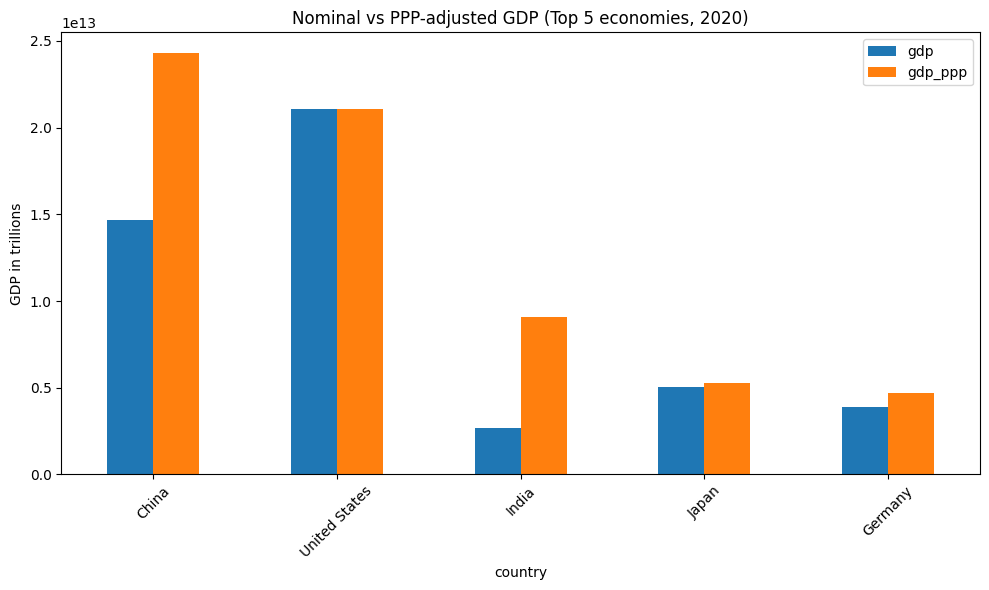

In [21]:

df_top5_gdp_ppp.plot(x='country', y=['gdp', 'gdp_ppp'], kind='bar', figsize=(10,6))
plt.title('Nominal vs PPP-adjusted GDP (Top 5 economies, 2020)')
plt.ylabel('GDP in trillions')
plt.xticks(rotation=45)
plt.tight_layout()

# Save plot
plt.savefig('visuals/Nominal vs PPP-adjusted GDP.png', bbox_inches='tight')
plt.show()


3. How has GDP per capita evolved over time for selected countries?

In [22]:
query = """
SELECT country, year, gdp_ppp_over_pop_c AS gdp_per_capita
FROM gdp_over_hours_worked
WHERE country IN ('China','United States','India','Japan','Germany')
ORDER BY country, year;
"""

df_gdp_trend = pd.read_sql_query(query, conn)
print(df_gdp_trend)






           country  year  gdp_per_capita
0            China  1980             NaN
1            China  1981             NaN
2            China  1982             NaN
3            China  1983             NaN
4            China  1984             NaN
..             ...   ...             ...
210  United States  2018       61,348.46
211  United States  2019       62,470.93
212  United States  2020       60,158.91
213  United States  2021       63,635.82
214  United States  2022       64,702.98

[215 rows x 3 columns]


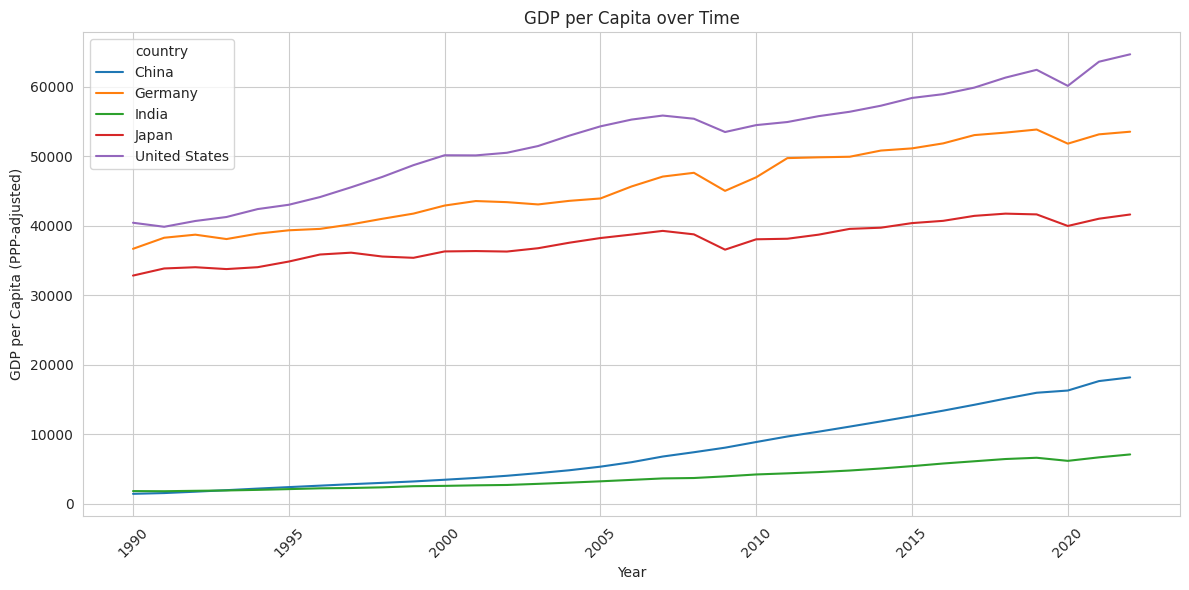

In [34]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_gdp_trend, x='year', y='gdp_per_capita', hue='country')
plt.title('GDP per Capita over Time')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (PPP-adjusted)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('visuals/GDP per Capita over Time.png', bbox_inches='tight')

plt.show()

## 🧠 Demographics & Labor




4. Is there a relationship between % of population over 65 and GDP per capita?  


In [24]:
query = """
SELECT country, year, gdp_ppp_over_pop_c AS gdp_per_capita, pop_over_65
FROM gdp_over_hours_worked
WHERE year = 2020
  AND gdp_ppp_over_pop_c IS NOT NULL
  AND pop_over_65 IS NOT NULL;
"""

df_gdp_pop = pd.read_sql_query(query, conn)
print(df_gdp_pop)



                                           country  year  gdp_per_capita  \
0                                       Arab World  2020       13,466.49   
1                                            World  2020       16,204.17   
2      East Asia & Pacific (excluding high income)  2020       14,458.05   
3    Europe & Central Asia (excluding high income)  2020       21,363.41   
4                                       South Asia  2020        5,937.45   
..                                             ...   ...             ...   
241                                        Namibia  2020        9,041.77   
242                                        Namibia  2020        9,041.77   
243                                        Namibia  2020        9,041.77   
244                                        Namibia  2020        9,041.77   
245                                        Namibia  2020        9,041.77   

     pop_over_65  
0           4.36  
1           9.43  
2          10.88  
3          

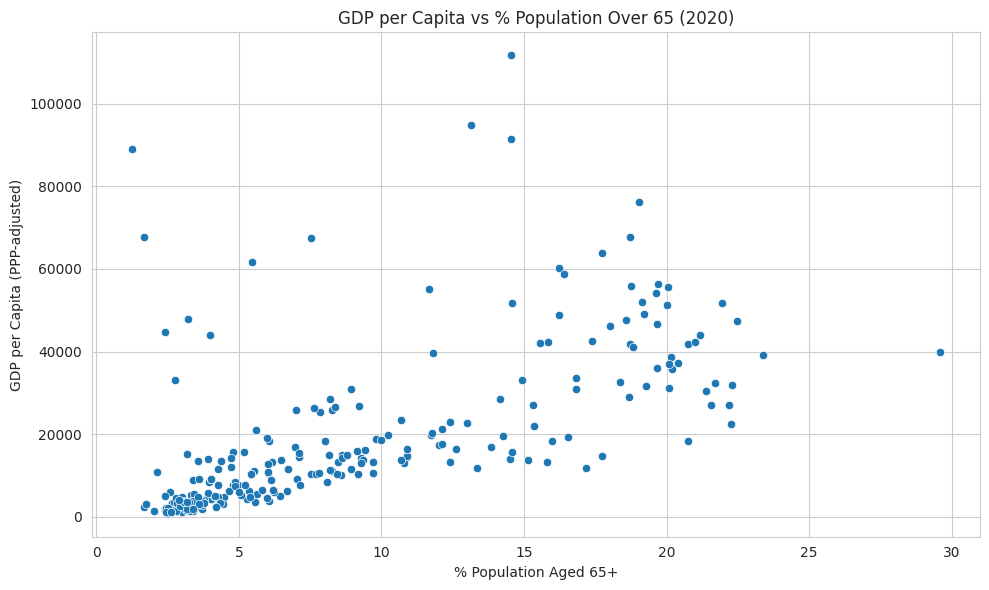

In [35]:

# Scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_gdp_pop, x='pop_over_65', y='gdp_per_capita')
plt.title('GDP per Capita vs % Population Over 65 (2020)')
plt.xlabel('% Population Aged 65+')
plt.ylabel('GDP per Capita (PPP-adjusted)')
plt.grid(True)
plt.tight_layout()
plt.savefig('visuals/GDP per Capita vs % Population Over 65 .png', bbox_inches='tight')

plt.show()

5. Do top 10 countries by GDP/capita also show high unemployment?  


In [26]:
query = """
SELECT country, year, gdp_ppp_over_pop_c AS gdp_per_capita, unemployment_r
FROM gdp_over_hours_worked
WHERE year = 2022
  AND gdp_ppp_over_pop_c IS NOT NULL
  AND unemployment_r IS NOT NULL
  AND country NOT IN ('North America','South Asia')
ORDER BY gdp_ppp_over_pop_c DESC
LIMIT 10;
"""

# Load the data into a DataFrame
df_top10 = pd.read_sql_query(query, conn)
print(df_top10)

                country  year  gdp_per_capita  unemployment_r
0            Luxembourg  2022      115,541.77            4.70
1               Ireland  2022      113,870.79            4.36
2             Singapore  2022      108,036.11            2.76
3                 Qatar  2022       97,096.94            0.10
4  United Arab Emirates  2022       74,299.01            2.75
5           Switzerland  2022       70,999.69            4.20
6                Norway  2022       67,462.38            3.17
7         United States  2022       64,702.98            3.61
8               Denmark  2022       59,704.23            4.17
9     Brunei Darussalam  2022       58,669.90            7.20


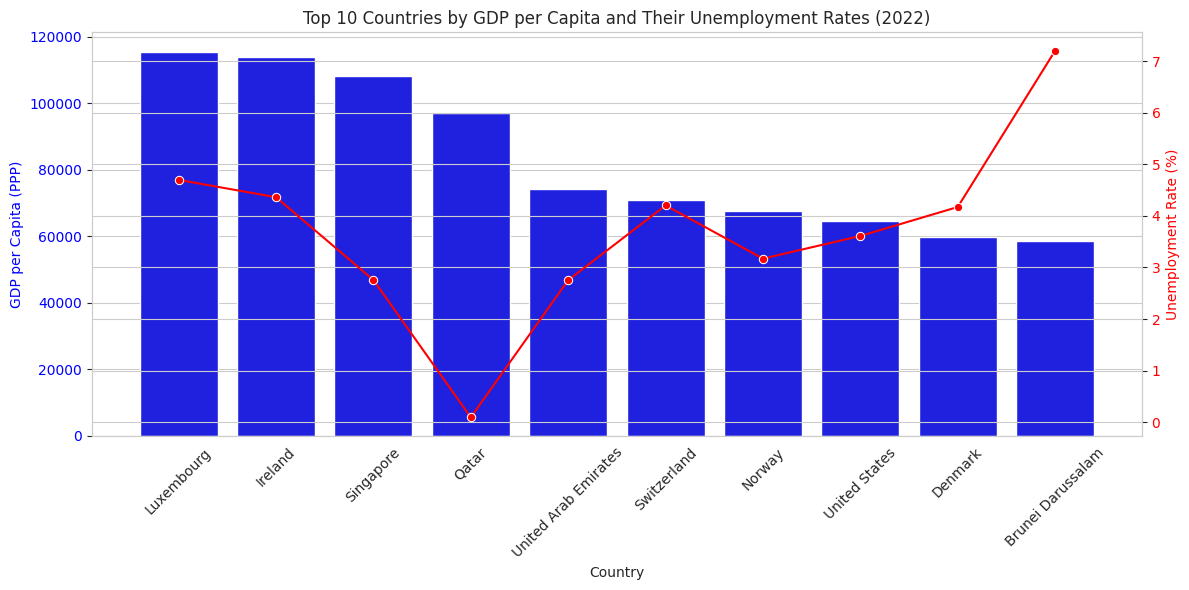

In [36]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create a barplot with GDP per capita on left y-axis
bar1 = sns.barplot(x='country', y='gdp_per_capita', data=df_top10, color='blue')
bar1.set_ylabel('GDP per Capita (PPP)', color='blue')
bar1.set_xlabel('Country')
bar1.set_title('Top 10 Countries by GDP per Capita and Their Unemployment Rates (2022)')
bar1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=45)

# Create a second y-axis to plot unemployment rate
bar2 = bar1.twinx()
sns.lineplot(x='country', y='unemployment_r', data=df_top10, sort=False, marker='o', color='red', ax=bar2)
bar2.set_ylabel('Unemployment Rate (%)', color='red')
bar2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
plt.savefig('visuals/Top10_countries_and_unemployment.png', bbox_inches='tight')

plt.show()

## 🌍 Global & Regional Comparisons



7. How has the **global average GDP per capita** evolved since 1990?  



In [28]:
query = """
SELECT year, gdp_over_pop_c AS avg_gdp_per_capita
FROM gdp_over_hours_worked
WHERE country = 'World'
  AND year >= 1990
ORDER BY year
"""

df_world = pd.read_sql_query(query, conn)

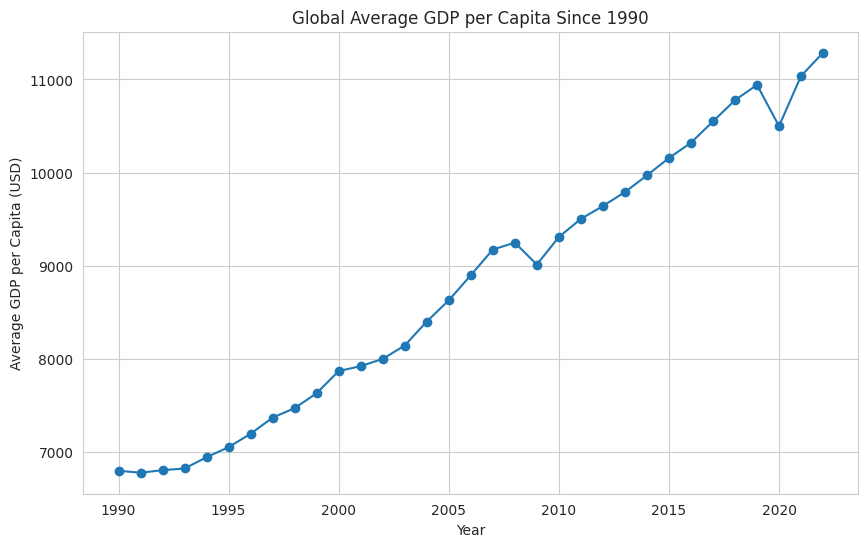

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df_world['year'], df_world['avg_gdp_per_capita'], marker='o')
plt.title('Global Average GDP per Capita Since 1990')
plt.xlabel('Year')
plt.ylabel('Average GDP per Capita (USD)')
plt.grid(True)
plt.savefig('visuals/Global Average GDP per Capita Since 1990.png', bbox_inches='tight')

plt.show()


8. How does the global trajectory compare with key countries (e.g., US, India, China)?  


In [30]:
query = """
SELECT year, gdp_over_pop_c AS gdp_per_capita, country
FROM gdp_over_hours_worked
WHERE country IN ('World', 'United States', 'India', 'China','Germany','Japan')
  AND year >= 1990
ORDER BY year, country;
"""

df_compare = pd.read_sql_query(query, conn)


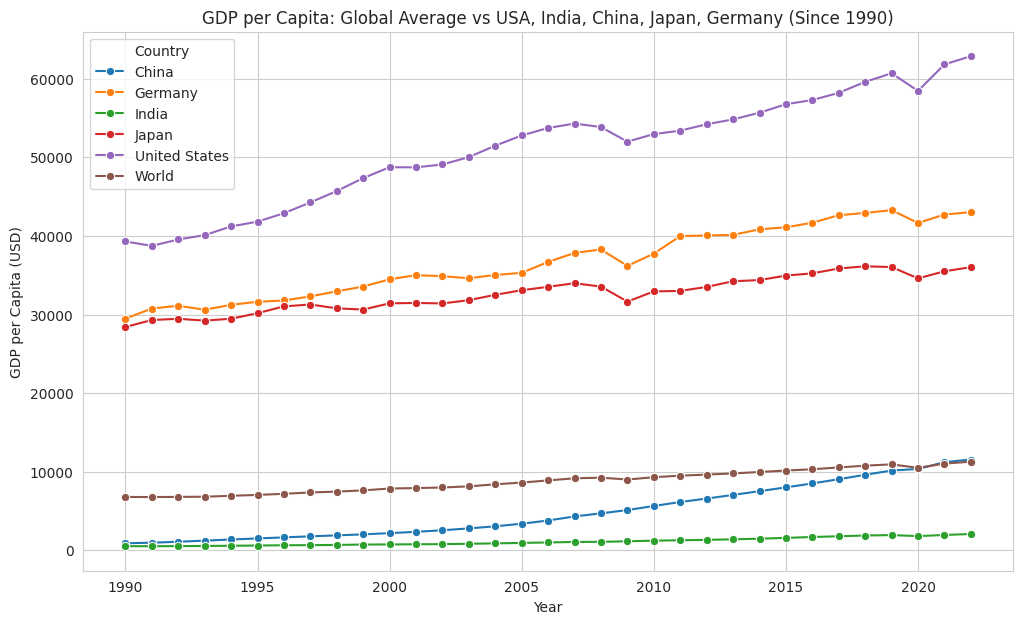

In [38]:
plt.figure(figsize=(12,7))
sns.lineplot(data=df_compare, x='year', y='gdp_per_capita', hue='country', marker='o')
plt.title('GDP per Capita: Global Average vs USA, India, China, Japan, Germany (Since 1990)')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (USD)')
plt.grid(True)
plt.legend(title='Country')
plt.savefig('visuals/GDP per Capita: Global Average vs Top countries.png', bbox_inches='tight')

plt.show()

9. Which regions contribute the most to global GDP? *(Sunburst or Treemap)*

In [52]:

query = """
SELECT country AS region, gdp
FROM gdp_over_hours_worked
WHERE year = 2020
AND country IN ('East Asia & Pacific',
               'Europe & Central Asia', 'Latin America & Caribbean', 'Middle East & North Africa',
               'South Asia', 'Sub-Saharan Africa',
               'North America')
ORDER BY gdp DESC;
"""

df_regions = pd.read_sql_query(query, conn)

fig = px.treemap(df_regions, path=['region'], values='gdp',
                 title='GDP Contribution by Region in 2020',
                 color='gdp', color_continuous_scale='Blues')

fig.write_html('visuals/Treemap_GDPcontribution.html')

fig.show()


#📊Regression analysis questions (exploratory)


10. Is there a significant relationship between labor force size and GDP per capita across countries?




In [41]:
# Suppose your DataFrame is df_clean and columns are named 'labor_force' and 'gdp_over_pop'

X = df_clean['labor_force']
y = df_clean['gdp_over_pop']

# Now combine
df = pd.concat([X, y], axis=1)

# Then filter out zeros or negatives
df_filtered = df[(df['labor_force'] > 0) & (df['gdp_over_pop'] > 0)]

# Separate back
X_filtered = df_filtered[['labor_force']]
y_filtered = df_filtered['gdp_over_pop']

# Log transform
X_log = np.log(X_filtered).values.reshape(-1, 1)
y_log = np.log(y_filtered).values.reshape(-1, 1)

# Fit model
model = LinearRegression()
model.fit(X_log, y_log)

# Extract coefficients
slope = model.coef_[0][0]
intercept = model.intercept_[0]
r_squared = model.score(X_log, y_log)

print(f"Regression equation (log-log): log(GDP per capita) = {intercept:.2f} + {slope:.2f} * log(Labor Force)")
print(f"R² (explained variance): {r_squared:.3f}")


Regression equation (log-log): log(GDP per capita) = 8.92 + -0.05 * log(Labor Force)
R² (explained variance): 0.007


11. Can we predict GDP per capita using demographic indicators like labor force size and percentage of population over 65?



In [42]:


# Prepare your data (make sure to filter out zeros or negatives if using log-transform)
df = df_clean.copy()  # your cleaned DataFrame with columns 'labor_force', 'pop_over_65', 'gdp_over_pop'

# Filter to avoid log(0) issues
df_filtered = df[(df['labor_force'] > 0) & (df['pop_over_65'] > 0) & (df['gdp_over_pop'] > 0)]

# Log transform
X = np.log(df_filtered[['labor_force', 'pop_over_65']])
y = np.log(df_filtered['gdp_over_pop'])

# Fit model
model = LinearRegression()
model.fit(X, y)

# Coefficients and intercept
coefficients = dict(zip(X.columns, model.coef_))
intercept = model.intercept_
r_squared = model.score(X, y)

print(f"Regression equation (log-log):")
print(f"log(GDP per capita) = {intercept:.2f} + " +
      " + ".join([f"{coef:.2f} * log({var})" for var, coef in coefficients.items()]))
print(f"R² (explained variance): {r_squared:.3f}")


Regression equation (log-log):
log(GDP per capita) = 6.80 + -0.08 * log(labor_force) + 1.50 * log(pop_over_65)
R² (explained variance): 0.446


12. Can we predict GDP per capita using demographic indicators like labor force and population over 65?

Labor force has a small negative coefficient (-0.08) → Suggests that countries with very large labor forces often have lower GDP per capita (think: India, Nigeria).

Population over 65 has a positive coefficient (1.50) → Indicates that countries with older populations (like Japan, Germany) tend to be wealthier.

R² = 0.446 → The model explains 44.6% of the variance in GDP per capita. That's decent for a simple demographic model, meaning these factors have a moderate influence.

The relationship is correlational, not causal.

Using regression analysis, I tested whether demographic indicators like labor force size and elderly population (% over 65) could predict GDP per capita. The log-log model explained ~45% of the variance, with a strong positive association with aging populations and a slight negative trend with large labor forces, reflecting structural differences between richer and poorer nations.



Download files

In [ ]:

!zip -r visuals.zip visuals
files.download('visuals.zip')
files.download('visuals/Treemap_GDPcontribution.html')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>